# Imports

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Sample Dataset Generation

In [2]:
data = []
date_range = pd.date_range("01/07/2020", "04/13/2020")

for i in range(len(date_range)):
    sales_cash = random.randint(1, 10)
    sales_card = random.randint(1, 10)
    
    day_type = "Weekday"
    
    if date_range[i].weekday() > 4:  # 0 for Monday, 4 for Friday
        day_type = "Weekend"
        
    data.append([str(date_range[i].date()), day_type, "Cash", sales_cash])
    data.append([str(date_range[i].date()), day_type, "Card", sales_card])
    
data = pd.DataFrame(data, columns=["Date", "Day_Type", "Payment_Type", "Sales"])

In [3]:
data.head()

,Date,Day_Type,Payment_Type,Sales
0,2020-01-07,Weekday,Cash,2
1,2020-01-07,Weekday,Card,7
2,2020-01-08,Weekday,Cash,2
3,2020-01-08,Weekday,Card,7
4,2020-01-09,Weekday,Cash,6


# Rolling Functions

### 1. Rolling Sum

In [4]:
data["rolling_sum_2"] = data.rolling(window=2).Sales.sum()
# data["rolling_sum_2"] = data["Sales"].rolling(window=2).sum()  <- This also works
data

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2
0,2020-01-07,Weekday,Cash,2,NaN
1,2020-01-07,Weekday,Card,7,9.0
2,2020-01-08,Weekday,Cash,2,9.0
3,2020-01-08,Weekday,Card,7,9.0
4,2020-01-09,Weekday,Cash,6,13.0
...,...,...,...,...,...
191,2020-04-11,Weekend,Card,3,6.0
192,2020-04-12,Weekend,Cash,2,5.0
193,2020-04-12,Weekend,Card,10,12.0
194,2020-04-13,Weekday,Cash,2,12.0


In [5]:
# min_period=1 for removing NaN in the first row
data["rolling_sum_2"] = data.rolling(window=2, min_periods=1).Sales.sum()
data

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2
0,2020-01-07,Weekday,Cash,2,2.0
1,2020-01-07,Weekday,Card,7,9.0
2,2020-01-08,Weekday,Cash,2,9.0
3,2020-01-08,Weekday,Card,7,9.0
4,2020-01-09,Weekday,Cash,6,13.0
...,...,...,...,...,...
191,2020-04-11,Weekend,Card,3,6.0
192,2020-04-12,Weekend,Cash,2,5.0
193,2020-04-12,Weekend,Card,10,12.0
194,2020-04-13,Weekday,Cash,2,12.0


The `min_periods` argument specifies the minimum number of observations in the current window required to generate a rolling value; otherwise, the result is `NaN`.

### 2. Rolling Sum over Days

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           196 non-null    object 
 1   Day_Type       196 non-null    object 
 2   Payment_Type   196 non-null    object 
 3   Sales          196 non-null    int64  
 4   rolling_sum_2  196 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.8+ KB


In [7]:
# Change Date column to datetime
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
data["rolling_sum_2days"] = data.rolling(window="2d", on="Date").Sales.sum()
# data["rolling_sum_2days"] = data["Sales"].rolling(window="2d", on="Date").sum()  <- This does NOT work
data

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2,rolling_sum_2days
0,2020-01-07,Weekday,Cash,2,2.0,2.0
1,2020-01-07,Weekday,Card,7,9.0,9.0
2,2020-01-08,Weekday,Cash,2,9.0,11.0
3,2020-01-08,Weekday,Card,7,9.0,18.0
4,2020-01-09,Weekday,Cash,6,13.0,15.0
...,...,...,...,...,...,...
191,2020-04-11,Weekend,Card,3,6.0,10.0
192,2020-04-12,Weekend,Cash,2,5.0,8.0
193,2020-04-12,Weekend,Card,10,12.0,18.0
194,2020-04-13,Weekday,Cash,2,12.0,14.0


In [9]:
# Filter the last record corresponding to each date
data.groupby("Date").last()

,Day_Type,Payment_Type,Sales,rolling_sum_2,rolling_sum_2days
Date,,,,,
2020-01-07,Weekday,Card,7,9.0,9.0
2020-01-08,Weekday,Card,7,9.0,18.0
2020-01-09,Weekday,Card,1,7.0,16.0
2020-01-10,Weekday,Card,2,6.0,13.0
2020-01-11,Weekend,Card,2,4.0,10.0
...,...,...,...,...,...
2020-04-09,Weekday,Card,3,10.0,19.0
2020-04-10,Weekday,Card,2,4.0,14.0
2020-04-11,Weekend,Card,3,6.0,10.0


### 3. Grouped Rolling

In [10]:
data["rolling_sum_grouped"] = (
    data.groupby("Payment_Type").rolling(window=2).Sales
    .sum().reset_index().set_index("level_1").sort_index()["Sales"]
)
data

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2,rolling_sum_2days,rolling_sum_grouped
0,2020-01-07,Weekday,Cash,2,2.0,2.0,NaN
1,2020-01-07,Weekday,Card,7,9.0,9.0,NaN
2,2020-01-08,Weekday,Cash,2,9.0,11.0,4.0
3,2020-01-08,Weekday,Card,7,9.0,18.0,14.0
4,2020-01-09,Weekday,Cash,6,13.0,15.0,8.0
...,...,...,...,...,...,...,...
191,2020-04-11,Weekend,Card,3,6.0,10.0,5.0
192,2020-04-12,Weekend,Cash,2,5.0,8.0,5.0
193,2020-04-12,Weekend,Card,10,12.0,18.0,13.0
194,2020-04-13,Weekday,Cash,2,12.0,14.0,4.0


### 4. Rolling Mean

In [11]:
data["rolling_avg_3days"] = data.rolling(window=6, min_periods=1).Sales.mean()

# The following also works
# data["rolling_avg_3days"] = data.rolling(window='3d', on="Date", min_periods=1).Sales.mean()

data

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2,rolling_sum_2days,rolling_sum_grouped,rolling_avg_3days
0,2020-01-07,Weekday,Cash,2,2.0,2.0,NaN,2.000000
1,2020-01-07,Weekday,Card,7,9.0,9.0,NaN,4.500000
2,2020-01-08,Weekday,Cash,2,9.0,11.0,4.0,3.666667
3,2020-01-08,Weekday,Card,7,9.0,18.0,14.0,4.500000
4,2020-01-09,Weekday,Cash,6,13.0,15.0,8.0,4.800000
...,...,...,...,...,...,...,...,...
191,2020-04-11,Weekend,Card,3,6.0,10.0,5.0,3.333333
192,2020-04-12,Weekend,Cash,2,5.0,8.0,5.0,2.500000
193,2020-04-12,Weekend,Card,10,12.0,18.0,13.0,3.666667
194,2020-04-13,Weekday,Cash,2,12.0,14.0,4.0,3.666667


### 5. Moving Average Plot

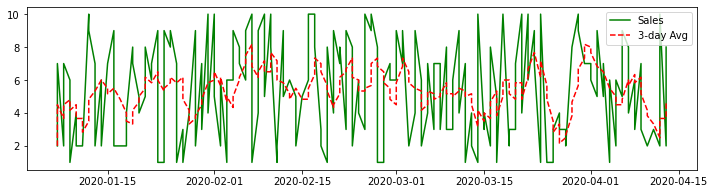

In [12]:
plt.figure(figsize=(12, 3))
plt.plot(data["Date"], data["Sales"], label="Sales", color="green")
plt.plot(
    data["Date"], data["rolling_avg_3days"], label="3-day Avg", 
    color="red", linestyle="--"
)
plt.legend()
plt.show();